# Load Dataset


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

df = pd.read_csv('movie_metadata.csv')

df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


# Handle Missing Values


In [ ]:
print("Before handling missing values:")
print(df.isnull().sum())

df.dropna(subset=['director_name', 'actor_2_name', 'actor_1_name', 'movie_title', 'title_year'], inplace=True)
df.loc[:, 'gross'] = df['gross'].fillna(df['gross'].median())
df.loc[:, 'budget'] = df['budget'].fillna(df['budget'].median())
df.loc[:, 'aspect_ratio'] = df['aspect_ratio'].fillna(df['aspect_ratio'].mode()[0])
df.loc[:, 'content_rating'] = df['content_rating'].fillna('Not Rated')
df.loc[:, 'color'] = df['color'].fillna(df['color'].mode()[0])
df.loc[:, 'num_critic_for_reviews'] = df['num_critic_for_reviews'].fillna(df['num_critic_for_reviews'].median())
df.loc[:, 'duration'] = df['duration'].fillna(df['duration'].median())
df.loc[:, 'actor_3_facebook_likes'] = df['actor_3_facebook_likes'].fillna(df['actor_3_facebook_likes'].median())
df.loc[:, 'actor_3_name'] = df['actor_3_name'].fillna('Unknown')
df.loc[:, 'facenumber_in_poster'] = df['facenumber_in_poster'].fillna(df['facenumber_in_poster'].median())
df.loc[:, 'plot_keywords'] = df['plot_keywords'].fillna('Unknown')
df.loc[:, 'num_user_for_reviews'] = df['num_user_for_reviews'].fillna(df['num_user_for_reviews'].median())
df.loc[:, 'language'] = df['language'].fillna(df['language'].mode()[0])
df.loc[:, 'country'] = df['country'].fillna(df['country'].mode()[0])


Before handling missing values:
color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64


In [86]:

print("After handling missing values:")
print(df.isnull().sum())

After handling missing values:
color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64


# Remove Duplicates


In [87]:
print("Before removing duplicates:")
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)

print("After removing duplicates:")
print(df.duplicated().sum())

Before removing duplicates:
44
After removing duplicates:
0


# Handle Inconsistent Data


In [88]:
print("Before handling inconsistent data:")
print(df['content_rating'].value_counts())

df['content_rating'] = df['content_rating'].replace({
    'X': 'NC-17',
    'Approved': 'PG',
    'Passed': 'PG',
    'GP': 'PG',
    'M': 'PG'
})


Before handling inconsistent data:
content_rating
R            2098
PG-13        1443
PG            698
Not Rated     365
G             112
Unrated        60
Approved       55
X              13
Passed          9
NC-17           7
GP              6
M               5
TV-G            4
TV-14           3
TV-PG           3
Name: count, dtype: int64


In [89]:

print("After handling inconsistent data:")
print(df['content_rating'].value_counts())

After handling inconsistent data:
content_rating
R            2098
PG-13        1443
PG            773
Not Rated     365
G             112
Unrated        60
NC-17          20
TV-G            4
TV-14           3
TV-PG           3
Name: count, dtype: int64


# Pearson Correlation


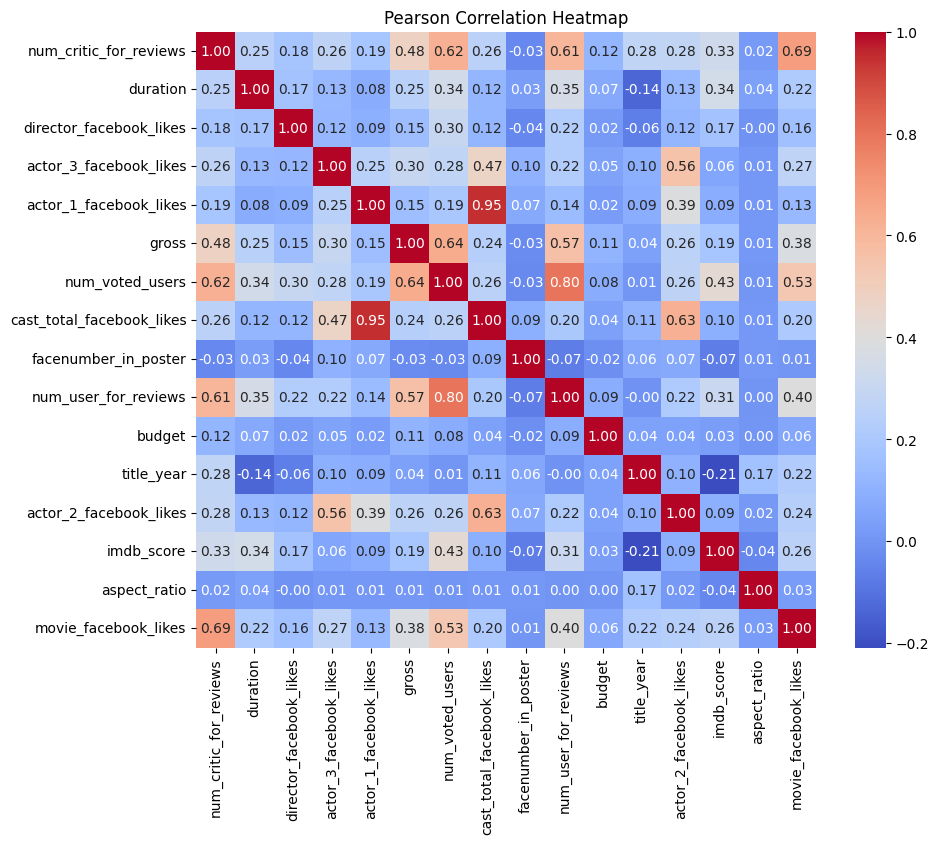

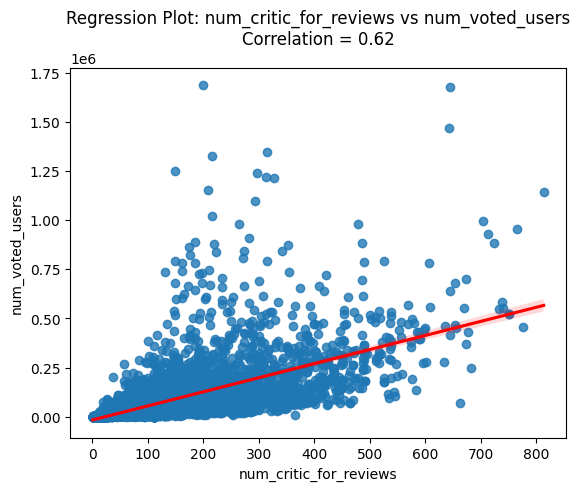

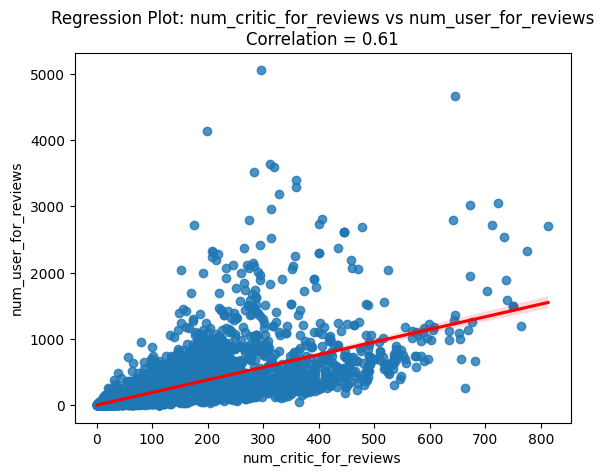

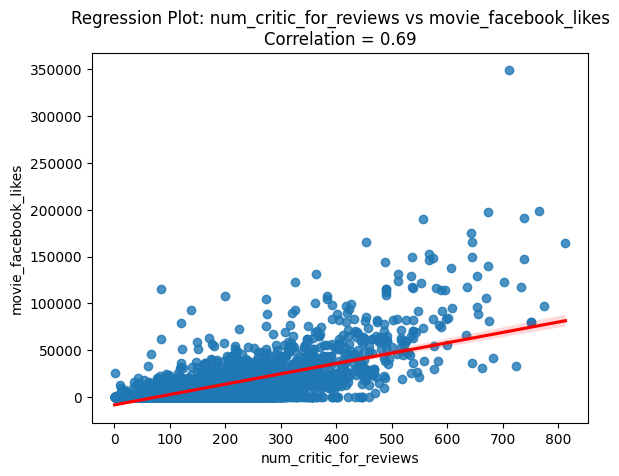

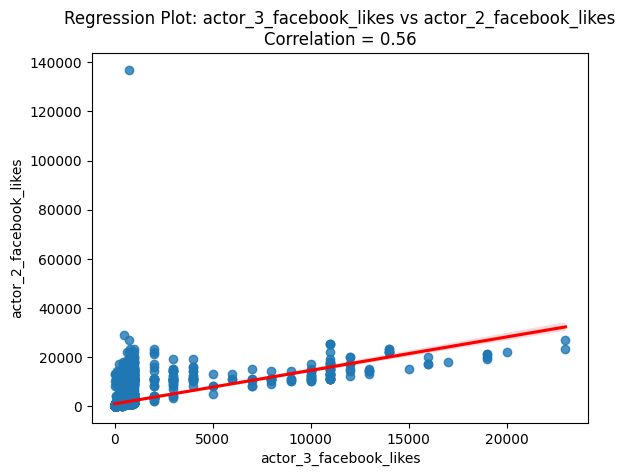

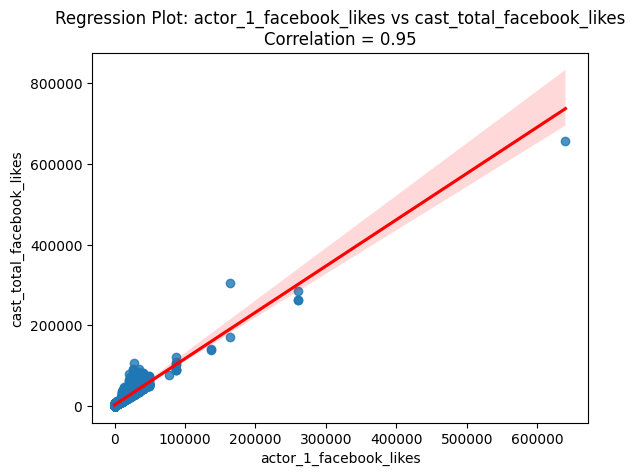

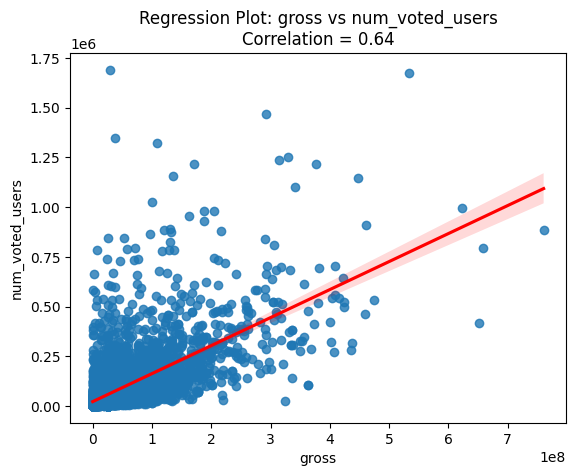

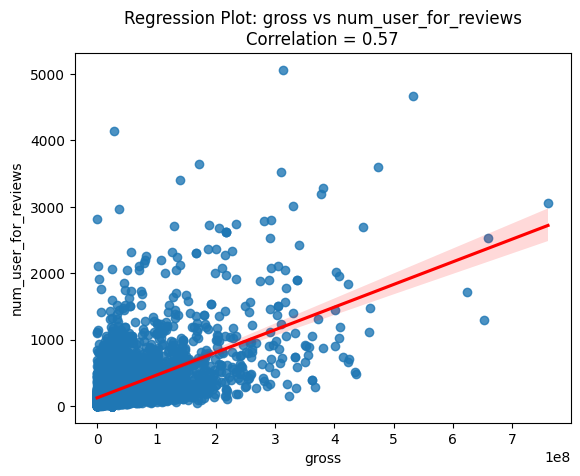

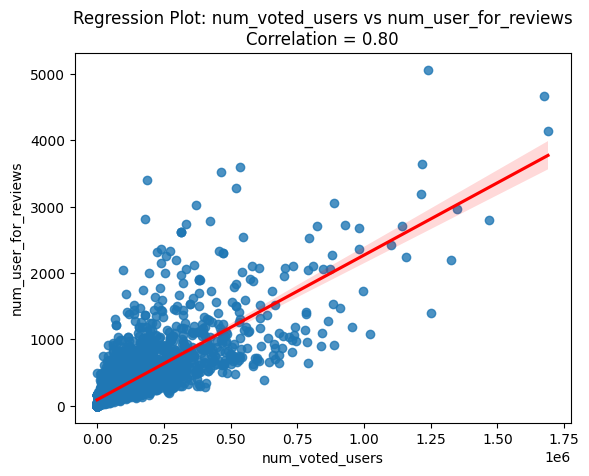

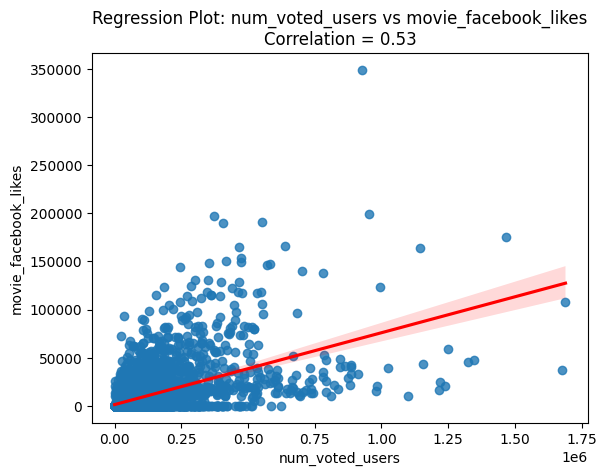

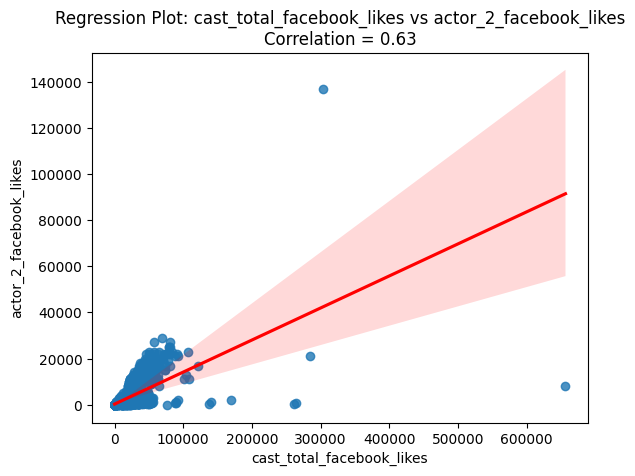

In [90]:
# Pearson Correlation
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix_pearson = numeric_df.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

high_corr_pairs = correlation_matrix_pearson.stack().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
high_corr_pairs = high_corr_pairs[(high_corr_pairs['Correlation'] > 0.5) & 
                                  (high_corr_pairs['Variable 1'] != high_corr_pairs['Variable 2'])]

high_corr_pairs = high_corr_pairs.drop_duplicates(subset=['Correlation'])

for index, row in high_corr_pairs.iterrows():
    sns.regplot(data=numeric_df, x=numeric_df[row['Variable 1']], y=numeric_df[row['Variable 2']], line_kws={"color": "red"})
    plt.title(f"Regression Plot: {row['Variable 1']} vs {row['Variable 2']}\nCorrelation = {row['Correlation']:.2f}")
    plt.show()

# Outliers and Cleaning


      num_critic_for_reviews  duration  director_facebook_likes  \
0                   4.800048  3.094530                 0.244431   
1                   1.320896  2.695522                 0.045152   
2                   3.800102  1.764504                 0.244431   
3                   5.543810  2.473851                 7.542672   
5                   2.643139  1.055156                 0.076300   
...                      ...       ...                      ...   
5037                1.059142  0.585210                 0.244431   
5038                1.166575  0.939884                 0.243723   
5040                1.067406  1.427560                 0.244431   
5041                1.059142  0.363539                 0.244431   
5042                0.819486  0.806881                 0.238767   

      actor_3_facebook_likes  actor_1_facebook_likes      gross  \
0                   0.126143                0.373325  11.362890   
1                   0.213602                2.192629   4.2005

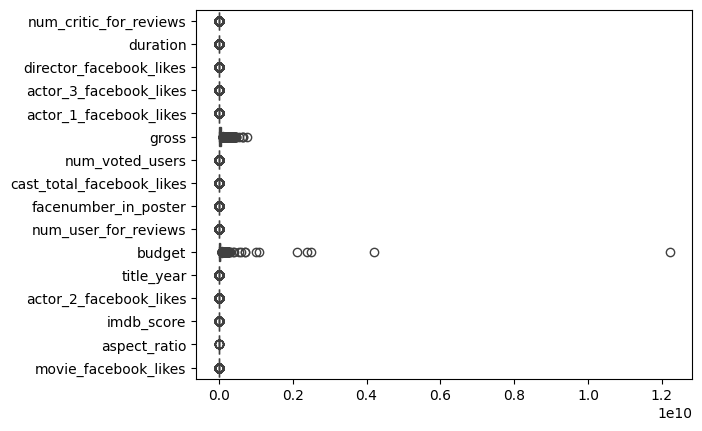

Shape After Removing Outliers (Z-Score): (4020, 16)


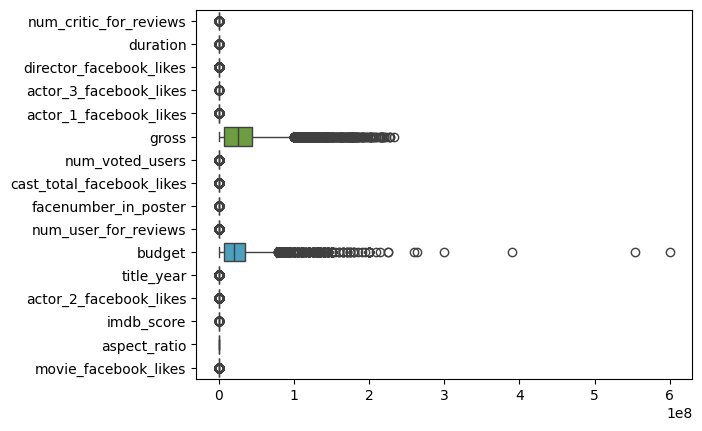

       num_critic_for_reviews     duration  director_facebook_likes  \
count             4020.000000  4020.000000              4020.000000   
mean               125.072886   104.846766               141.433831   
std                 97.901227    16.619684               301.895762   
min                  1.000000    41.000000                 0.000000   
25%                 49.000000    93.000000                 7.000000   
50%                104.000000   102.000000                42.000000   
75%                176.000000   114.000000               160.000000   
max                495.000000   172.000000              6000.000000   

       actor_3_facebook_likes  actor_1_facebook_likes         gross  \
count             4020.000000             4020.000000  4.020000e+03   
mean               401.390796             5240.161940  3.463192e+07   
std                372.989954             8185.032285  3.967700e+07   
min                  0.000000                0.000000  1.620000e+02   
25%  

In [91]:
from scipy.stats import zscore

numeric_df = df.select_dtypes(include=[np.number])

z_scores = np.abs(zscore(numeric_df))
print(z_scores)

outliers = np.where(z_scores > 3)
print("Outlier Locations:\n", outliers)

sns.boxplot(data=numeric_df, orient='h')
plt.show()

numeric_df_cleaned = numeric_df[(z_scores < 3).all(axis=1)]
print("Shape After Removing Outliers (Z-Score):", numeric_df_cleaned.shape)

sns.boxplot(data=numeric_df_cleaned, orient='h')
plt.show()

print(numeric_df_cleaned.describe())


# Calculate VIF 

                      Feature           VIF
0                       const  62324.395057
1      num_critic_for_reviews      2.960486
2                    duration      1.225081
3     director_facebook_likes      1.075327
4      actor_3_facebook_likes      3.924882
5      actor_1_facebook_likes    212.945778
6                       gross      1.969172
7             num_voted_users      3.586834
8   cast_total_facebook_likes    294.154959
9        facenumber_in_poster      1.040042
10       num_user_for_reviews      2.848133
11                     budget      1.559204
12                 title_year      1.378570
13     actor_2_facebook_likes     15.014111
14               aspect_ratio      1.134123
15       movie_facebook_likes      1.808907


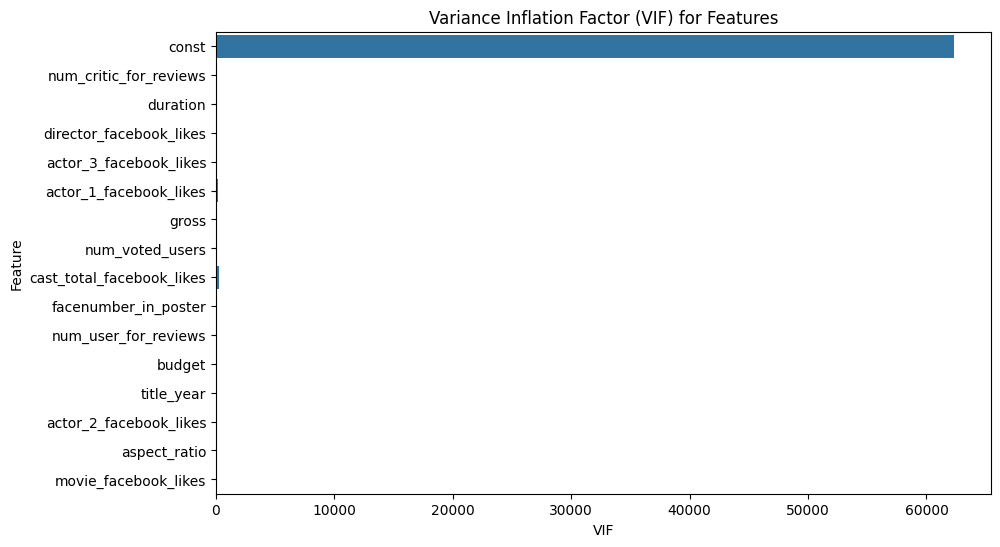

In [92]:
X = numeric_df_cleaned.drop(columns=['imdb_score'])
X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

plt.figure(figsize=(10, 6))
sns.barplot(x="VIF", y="Feature", data=vif_data)
plt.title("Variance Inflation Factor (VIF) for Features")
plt.show()

# Model Simplification using AIC 

In [93]:
y = numeric_df_cleaned['imdb_score']
X = numeric_df_cleaned.drop(columns=['imdb_score'])
X = sm.add_constant(X)
initial_model = sm.OLS(y, X).fit()
print(f"Initial Model AIC: {initial_model.aic}")

def calculate_aic(features):
    X = numeric_df_cleaned[features]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model.aic

def backward_elimination(data, target, significance_level=0.05):
    features = data.columns.tolist()
    features.remove('imdb_score')
    while len(features) > 0:
        aic_values = []
        for feature in features:
            temp_features = features.copy()
            temp_features.remove(feature)
            aic = calculate_aic(temp_features)
            aic_values.append((aic, feature))
        aic_values.sort()
        best_aic, worst_feature = aic_values[0]
        if best_aic < initial_model.aic:
            features.remove(worst_feature)
            initial_model.aic = best_aic
        else:
            break
    return features

selected_features = backward_elimination(numeric_df_cleaned, 'imdb_score')
X_selected = numeric_df_cleaned[selected_features]
X_selected = sm.add_constant(X_selected)
final_model = sm.OLS(y, X_selected).fit()
print(final_model.summary())



Initial Model AIC: 10133.224292975236
                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     128.3
Date:                Sun, 15 Dec 2024   Prob (F-statistic):          1.08e-290
Time:                        13:18:42   Log-Likelihood:                -5051.0
No. Observations:                4020   AIC:                         1.013e+04
Df Residuals:                    4006   BIC:                         1.022e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [94]:
print(f"Selected Features: {selected_features}")
print(f"Initial Model AIC: {initial_model.aic}")
print(f"Final Model AIC: {final_model.aic}")
print(f"Initial Model BIC: {initial_model.bic}")
print(f"Final Model BIC: {final_model.bic}")
print(f"Initial Model Adjusted R-squared: {initial_model.rsquared_adj}")
print(f"Final Model Adjusted R-squared: {final_model.rsquared_adj}")

Selected Features: ['num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_1_facebook_likes', 'gross', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year', 'actor_2_facebook_likes', 'aspect_ratio']
Initial Model AIC: 10129.918067615352
Final Model AIC: 10129.918067615352
Initial Model BIC: 10234.008887881044
Final Model BIC: 10218.104588157936
Initial Model Adjusted R-squared: 0.2913979510022451
Final Model Adjusted R-squared: 0.2916294807997718


# Feature Selection using Recursive Feature Elimination (RFE)


In [95]:
y = numeric_df_cleaned['imdb_score']
X = numeric_df_cleaned.drop(columns=['imdb_score'])

model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(X, y)

selected_features_rfe = X.columns[rfe.support_]
print(f"Selected Features using RFE: {selected_features_rfe}")

X_selected_rfe = X[selected_features_rfe]
X_selected_rfe = sm.add_constant(X_selected_rfe)
final_model_rfe = sm.OLS(y, X_selected_rfe).fit()

print(final_model_rfe.summary())


Selected Features using RFE: Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes',
       'cast_total_facebook_likes', 'facenumber_in_poster', 'title_year',
       'actor_2_facebook_likes', 'aspect_ratio'],
      dtype='object')
                            OLS Regression Results                            
Dep. Variable:             imdb_score   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     106.1
Date:                Sun, 15 Dec 2024   Prob (F-statistic):          5.38e-196
Time:                        13:18:42   Log-Likelihood:                -5278.6
No. Observations:                4020   AIC:                         1.058e+04
Df Residuals:                    4009   BIC:                         1.065e+04
Df Model:                          10                         

# Final Model Evaluation

Mean Squared Error (MSE): 0.7225547204499784
Root Mean Squared Error (RMSE): 0.85003218789054
R-squared (R2): 0.29392080121519937


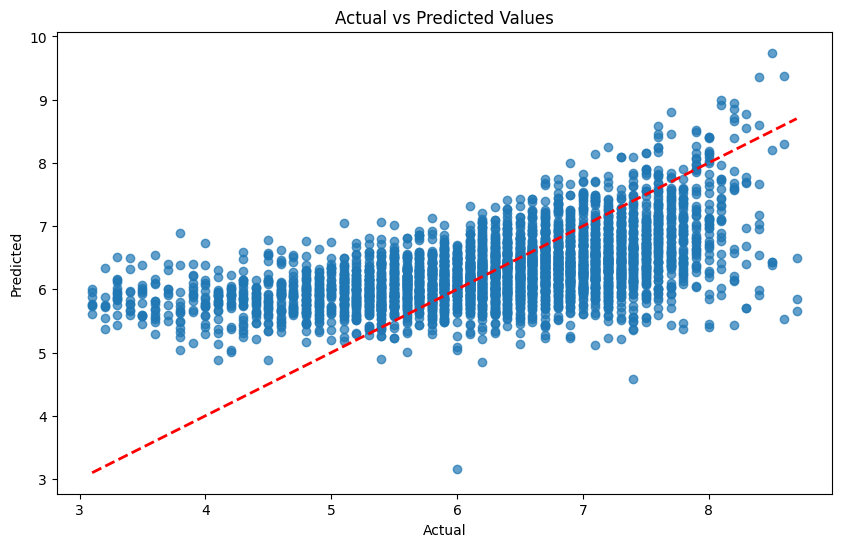

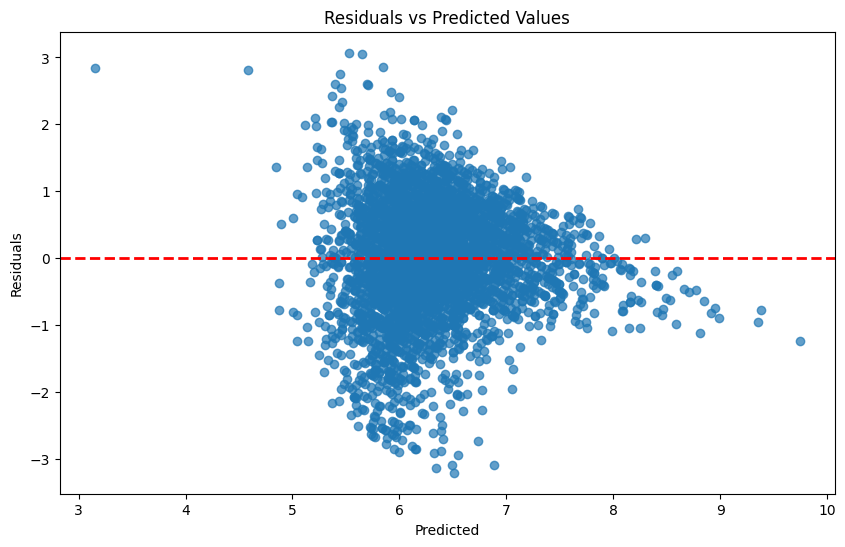

Summary Statistics of Residuals:
count    4.020000e+03
mean     1.782508e-12
std      8.501379e-01
min     -3.208617e+00
25%     -4.962184e-01
50%      4.645987e-02
75%      5.771546e-01
max      3.071105e+00
dtype: float64
Cross-Validation R-squared Scores: [0.27019404 0.34756086 0.36157303 0.28000081 0.10191004]
Mean Cross-Validation R-squared: 0.27224775479035596


In [96]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = final_model.predict(X_selected)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

residuals = y - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

print("Summary Statistics of Residuals:")
print(residuals.describe())

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_selected, y, cv=5, scoring='r2')
print(f"Cross-Validation R-squared Scores: {cv_scores}")
print(f"Mean Cross-Validation R-squared: {np.mean(cv_scores)}")
